# Content
1. What is correlation test?
2. Install and load required R packages
3. Methods for correlation analyses
4. Correlation formula
    * Pearson correlation formula
    * Spearman correlation formula
    * Kendall correlation formula
5. Compute correlation in R
    * R functions
    * Import your data into R
    * Visualize your data using scatter plots
    * Preleminary test to check the test assumptions
    * Pearson correlation test
        * Interpretation of the result
        * Access to the values returned by cor.test() function
    * Kendall rank correlation test
    * Spearman rank correlation coefficient
6. Interpret correlation coefficient

## 1. What is correlation test?

**Correlation test** is used to evaluate the association between two or more variables. For instance, if we are interested to know whether there is a relationship between the heights of fathers and sons, a **correlation coefficient** can be calculated to answer this question.

If there is no relationship between the two variables (father and son heights), the average height of son should be the same regardless of the height of the fathers and vice versa.

Here, we’ll describe the different correlation methods and we’ll provide pratical examples using R software.

## 2. Install and load required R packages
We’ll use the ggpubr R package for an easy ggplot2-based data visualization

Install the latest version from GitHub as follow (recommended):

In [2]:
# if(!require(devtools)) install.packages("devtools")
# devtools::install_github("kassambara/ggpubr")

Or, install from CRAN as follow:

In [3]:
# install.packages("ggpubr")
library("ggpubr")

## 3. Methods for corelation analysis
There are different methods to perform correlation analysis:
- **Pearson correlation (r)**, which measures a linear dependence between two variables (x and y). It’s also known as a parametric correlation test because it depends to the distribution of the data. It can be used only when x and y are from normal distribution. The plot of y = f(x) is named the linear regression curve.
- **Kendall tau** and **Spearman rho**, which are rank-based correlation coefficients (non-parametric)

-> **The most commonly used method is the Pearson correlation method.**

## 4. Correlation formula
In the formula below,

- x and y are two vectors of length n
- $m_x$ and $m_y$ corresponds to the means of x and y, respectively.

### a. Pearson correlation formula
$$r = \frac{\sum{(x-m_x)(y-m_y)}}{\sqrt{\sum{(x-m_x)^2}\sum{(y-m_y)^2}}}$$

$m_x$ and $m_y$ are the means of x and y variables.

The p-value (significance level) of the correlation can be determined :

1. by using the correlation coefficient table for the degrees of freedom : df=n−2, where n is the number of observation in x and y variables.

2. or by calculating the t value as follow:
$$t = \frac{r}{\sqrt{1-r^2}}\sqrt{n-2}$$

In the case 2) the corresponding p-value is determined using [t distribution table](http://www.sthda.com/english/wiki/t-distribution-table) for $df = n-2$

-> **If the p-value is < 5%, then the correlation between x and y is significant.**


### b. Spearman correlation formula
The **Spearman correlation** method computes the correlation between the rank of x and the rank of y variables.
$$rho = \frac{\sum(x' - m_{x'})(y'_i - m_{y'})}{\sqrt{\sum(x' - m_{x'})^2 \sum(y' - m_{y'})^2}}$$
Where $x′=rank(x)$ and $y′=rank(y)$

### c. Kendall correlation formula
The **Kendall correlation** method measures the correspondence between the ranking of x and y variables. The total number of possible pairings of x with y observations is $n(n−1)/2$, where n is the size of x and y.

The procedure is as follow:

- Begin by ordering the pairs by the x values. If x and y are correlated, then they would have the same relative rank orders.

- Now, for each $y_i$, count the number of **$y_j>y_i$ (concordant pairs (c))** and the number of **$y_j<y_i$ (discordant pairs (d)).**

Kendall correlation distance is defined as follow:
$$tau = \frac{n_c - n_d}{\frac{1}{2}n(n-1)}$$
Where,
* $n_c$: total number of concordant pairs
* $n_d$: total number of discordant pairs
* $n$: size of x and y


## 5. Compute correlation in R
### a. R functions
Correlation coefficient can be computed using the functions **cor()** or **cor.test()**:

* **cor()** computes the **correlation coefficient**

* **cor.test()** test for association/correlation between paired samples. It returns both the **correlation coefficient** and the **significance level** (or p-value) of the correlation .

The simplified formats are:
- cor(x, y, method = c("pearson", "kendall", "spearman"))
- cor.test(x, y, method=c("pearson", "kendall", "spearman"))

* x, y: numeric vectors with the same length
* method: correlation method

**Note:** If your data contain missing values, use the following R code to handle missing values by case-wise deletion.
- cor(x, y,  method = "pearson", use = "complete.obs")

### b. Import data into R
1. Prepare your data as specified here: Best practices for preparing your data set for R
2. Save your data in an external .txt tab or .csv files
3. Import your data into R as follow:
    * my_data <- read.delim(file.choose()) # If .txt tab file, use this
    * my_data <- read.csv(file.choose()) # Or, if .csv file, use this

Here, we’ll use the built-in R data set mtcars as an example. The R code below computes the correlation between mpg and wt variables in mtcars data set:

In [4]:
my_data <- mtcars
head(my_data, 6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


**We want to compute the correlation between mpg and wt variables.**

### c. Visualize data using scatter plots
To use R base graphs, click this link: [scatter plot - R base graphs](http://www.sthda.com/english/wiki/scatter-plots-r-base-graphs). Here, we’ll use the [ggpubr R package](http://www.sthda.com/english/articles/24-ggpubr-publication-ready-plots/).

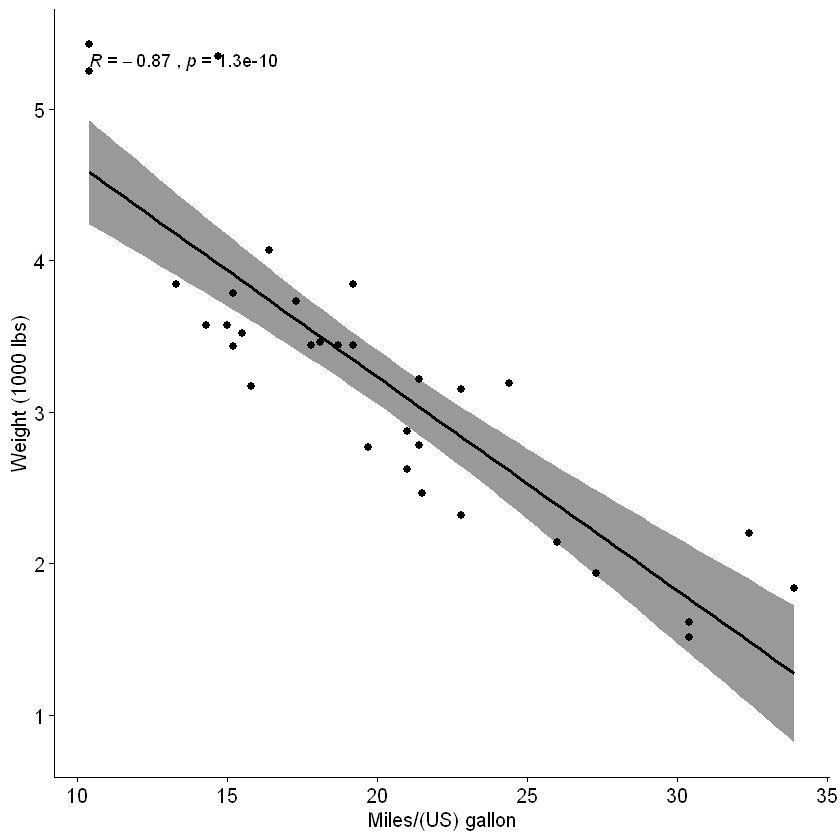

In [5]:
library("ggpubr")
ggscatter(my_data, x = "mpg", y = "wt", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)") 

### d. Preleminary test to check the test assumptions
1. **Is the covariation linear?** 
Yes, form the plot above, the relationship is linear. In the situation where the scatter plots show curved patterns, we are dealing with nonlinear association between the two variables.

2. **Are the data from each of the 2 variables (x, y) follow a normal distribution?**
    * Use Shapiro-Wilk normality test –> R function: shapiro.test()
    * and look at the normality plot —> R function: ggpubr::ggqqplot()

3. **Shapiro-Wilk** test can be performed as follow:
    * Null hypothesis: the data are normally distributed
    * Alternative hypothesis: the data are not normally distributed

In [6]:
# Shapiro-Wilk normality test for mpg
shapiro.test(my_data$mpg) # => p = 0.1229
# Shapiro-Wilk normality test for wt
shapiro.test(my_data$wt) # => p = 0.09


	Shapiro-Wilk normality test

data:  my_data$mpg
W = 0.94756, p-value = 0.1229



	Shapiro-Wilk normality test

data:  my_data$wt
W = 0.94326, p-value = 0.09265


**From the output, the two p-values are greater than the significance level 0.05 implying that the distribution of the data are not significantly different from normal distribution. In other words, we can assume the normality.**

4. **Visual inspection** of the data normality using **Q-Q plots** (quantile-quantile plots). Q-Q plot draws the correlation between a given sample and the normal distribution.

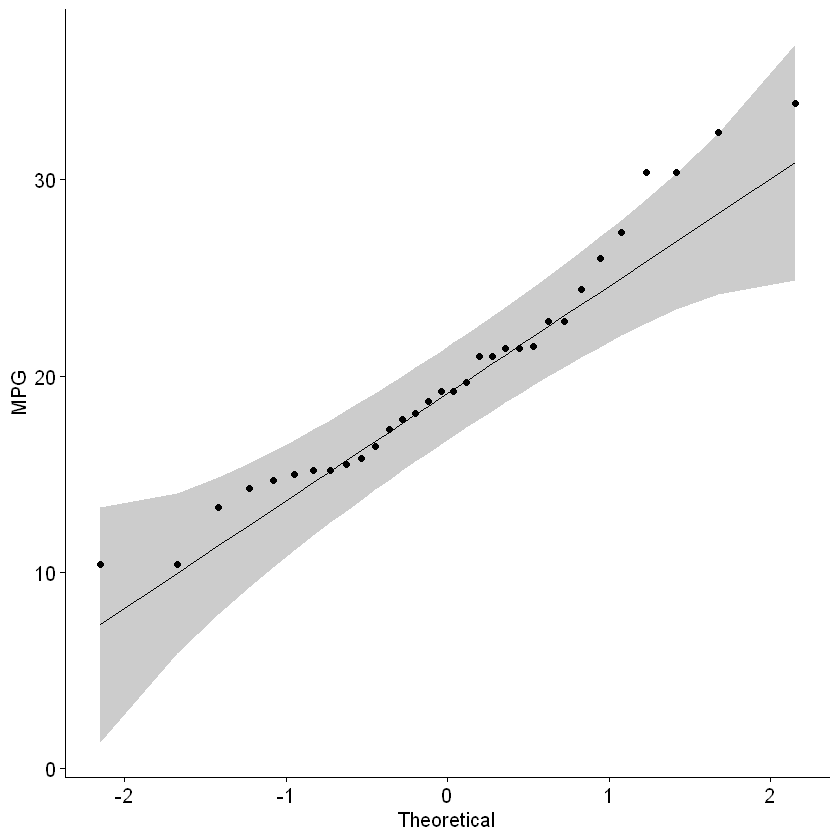

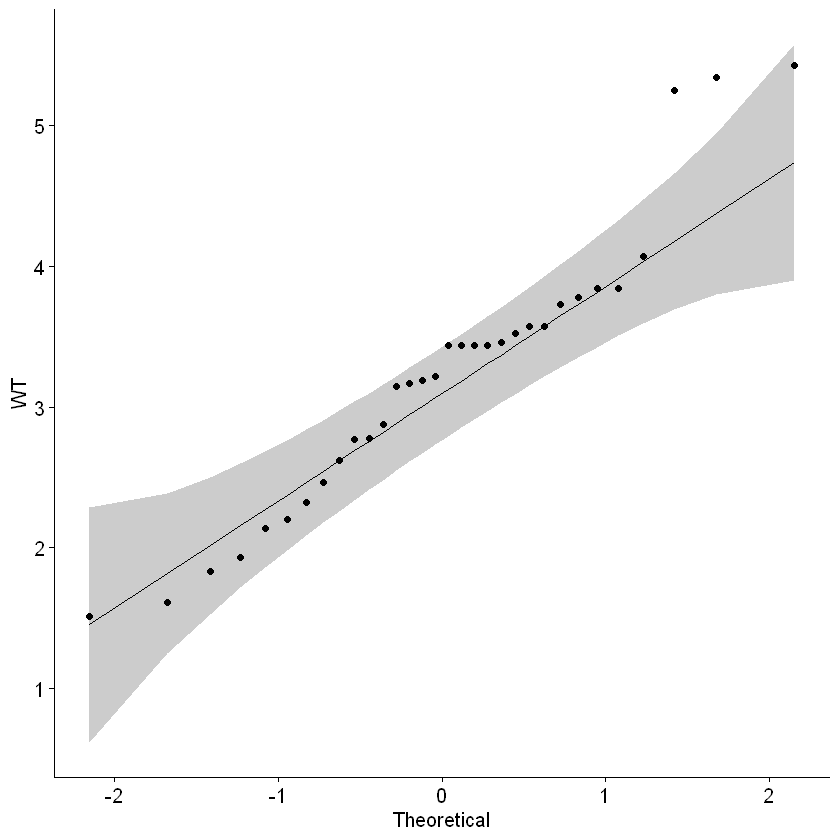

In [7]:
library("ggpubr")
# mpg
ggqqplot(my_data$mpg, ylab = "MPG")
# wt
ggqqplot(my_data$wt, ylab = "WT")

**From the normality plots, we conclude that both populations may come from normal distributions.**

**Note:** If the data are not normally distributed, it’s recommended to use the non-parametric correlation, including Spearman and Kendall rank-based correlation tests.

### e. Pearson correlation test
Correlation test between mpg and wt variables:

In [8]:
res <- cor.test(my_data$wt, my_data$mpg, method = "pearson")
res


	Pearson's product-moment correlation

data:  my_data$wt and my_data$mpg
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


In the result above :
- **t** is the **t-test statistic value** (t = -9.559),
- **df** is the degrees of freedom (df= 30),
- **p-value** is the significance level of the **t-test** (p-value = 1.29410^{-10}).
- **conf.int** is the **confidence interval** of the correlation coefficient at 95% (conf.int = [-0.9338, -0.7441]);
- **sample estimates** is the correlation coefficient (Cor.coeff = -0.87).

#### Interpretation of the result
The **p-value** of the test is 1.29410^{-10}, which is less than the significance level alpha = 0.05. We can conclude that wt and mpg are significantly correlated with a correlation coefficient of -0.87 and p-value of $1.29410^{-10}$.

#### Access to the values returned by cor.test() function
The function cor.test() returns a list containing the following components:
- **p.value**: the p-value of the test
- **estimate**: the correlation coefficient

In [9]:
# Extract the p.value
res$p.value

# Extract the correlation coefficient
res$estimate

[1] 1.293959e-10

cor 
-0.8676594

### f. Kendall rank correlation test
The **Kendall rank correlation coefficient** or **Kendall’s tau** statistic is used to estimate a rank-based measure of association. This test may be used if the data do not necessarily come from a bivariate normal distribution.

In [10]:
res2 <- cor.test(my_data$wt, my_data$mpg,  method="kendall")
res2

Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "kendall"):
"Cannot compute exact p-value with ties"



	Kendall's rank correlation tau

data:  my_data$wt and my_data$mpg
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


**tau** is the **Kendall correlation coefficient**.

The **correlation coefficient** between x and y are -0.7278 and the p-value is $6.70610^{-9}$.

### g. Spearman rank correlation coefficient 
Spearman’s **rho** statistic is also used to estimate a rank-based measure of association. This test may be used if the data do not come from a bivariate normal distribution.

In [11]:
res2 <-cor.test(my_data$wt, my_data$mpg,  method = "spearman")
res2

Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  my_data$wt and my_data$mpg
S = 10292, p-value = 1.488e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.886422 


**rho** is the **Spearman’s correlation coefficient**.

The **correlation coefficient** between x and y are -0.8864 and the p-value is $1.48810^{-11}$.

## 6. Interpret correlation coefficient
Correlation coefficient is comprised between -1 and 1:
- **1** indicates a strong **negative correlation** : this means that every time **x increases, y decreases** (top panel figure)
- **0** means that there is **no association** between the two variables (x and y) (middle panel figure)
- **1** indicates a strong **positive correlation** : this means that **y increases** with **x** (bottom panel figure)
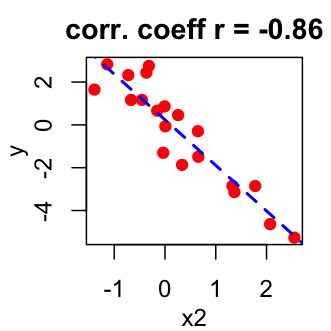 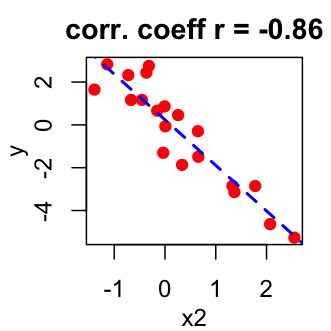 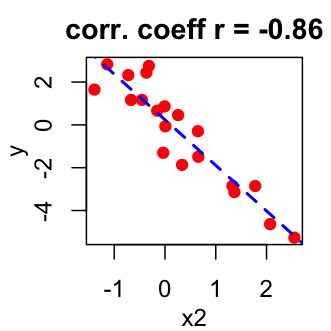

Source: http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r#what-is-correlation-test